In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('./result-multi-u.csv')

In [14]:
data

,rrt sampling,prm sampling,field width,field height,num mobiles,num statics,trial,uptime,elapsed time
0,500,0,200,200,20,0,#0,736974,0.029718
1,500,40,200,200,20,0,#0,736974,0.030174
2,500,0,200,200,20,0,#1,727768,0.024805
3,500,40,200,200,20,0,#1,722514,0.022265
4,500,0,200,200,20,0,#2,722681,0.023539
...,...,...,...,...,...,...,...,...,...
7195,500,40,800,600,40,40,#97,676200,0.603876
7196,500,0,800,600,40,40,#98,683957,0.587573
7197,500,40,800,600,40,40,#98,683263,0.634500
7198,500,0,800,600,40,40,#99,669683,0.835089


In [15]:
data_mean = data.drop(['trial'], axis=1).groupby(
  ['field width', 'field height', 'num mobiles', 'num statics', 'prm sampling'], as_index=False).mean()
data_mean

,field width,field height,num mobiles,num statics,prm sampling,rrt sampling,uptime,elapsed time
0,200,200,20,0,0,500.0,733073.45,0.025682
1,200,200,20,0,40,500.0,732579.59,0.026935
2,200,200,20,20,0,500.0,733852.06,0.026289
3,200,200,20,20,40,500.0,733482.97,0.027800
4,200,200,20,40,0,500.0,732923.14,0.027905
...,...,...,...,...,...,...,...,...
67,800,600,40,0,40,500.0,682195.44,0.639336
68,800,600,40,20,0,500.0,684349.16,0.681617
69,800,600,40,20,40,500.0,684702.55,0.688079
70,800,600,40,40,0,500.0,683279.31,0.669271


In [17]:
mean600p0 = data_mean.groupby(['field width', 'field height', 'prm sampling']).get_group((600, 600, 0))
mean600p40 = data_mean.groupby(['field width', 'field height', 'prm sampling']).get_group((600, 600, 40))

In [18]:
mean600p0

,field width,field height,num mobiles,num statics,prm sampling,rrt sampling,uptime,elapsed time
36,600,600,20,0,0,500.0,648701.41,0.095109
38,600,600,20,20,0,500.0,648874.03,0.092500
40,600,600,20,40,0,500.0,650411.36,0.095501
42,600,600,30,0,0,500.0,688942.30,0.292422
44,600,600,30,20,0,500.0,689510.54,0.300256
46,600,600,30,40,0,500.0,686914.62,0.299248
48,600,600,40,0,0,500.0,701748.45,0.586216
50,600,600,40,20,0,500.0,700556.72,0.540078
52,600,600,40,40,0,500.0,701507.73,0.519257


In [19]:
mean600p40

,field width,field height,num mobiles,num statics,prm sampling,rrt sampling,uptime,elapsed time
37,600,600,20,0,40,500.0,647739.57,0.095078
39,600,600,20,20,40,500.0,651374.93,0.095518
41,600,600,20,40,40,500.0,647650.31,0.097165
43,600,600,30,0,40,500.0,689941.58,0.306097
45,600,600,30,20,40,500.0,689748.16,0.301429
47,600,600,30,40,40,500.0,687382.07,0.296904
49,600,600,40,0,40,500.0,701143.94,0.588160
51,600,600,40,20,40,500.0,701041.09,0.554946
53,600,600,40,40,40,500.0,701272.16,0.520033


In [20]:
def plot_uptimes(data):
  uptimes = data['uptime'].values.reshape((3, 3)) / 3600
  num_mobiles= data['num mobiles'].values
  num_statics = data['num statics'].values

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  ax.imshow(uptimes, cmap='GnBu')
  ax.set_xticks(np.arange(uptimes.shape[1]))
  ax.set_xticklabels(['0', '20', '40'])
  ax.set_yticks(np.arange(uptimes.shape[0]))
  ax.set_yticklabels(['20', '30', '40'])
  ax.set_xlabel('Number of static sensors')
  ax.set_ylabel('Number of mobile sensors')
  ax.set_title('Uptime [hour]')
  
  for i in range(uptimes.shape[0]):
    for j in range(uptimes.shape[1]):
      ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
  plt.show()

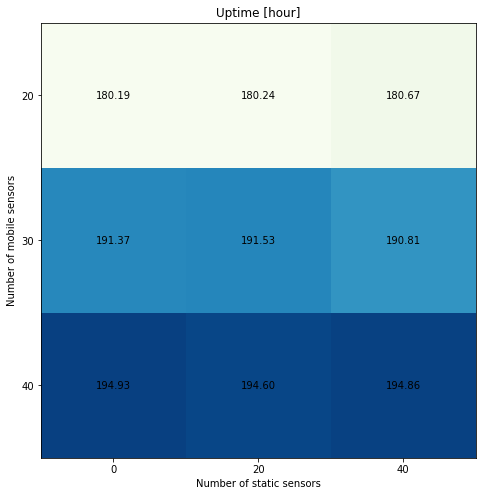

In [21]:
plot_uptimes(mean600p0)

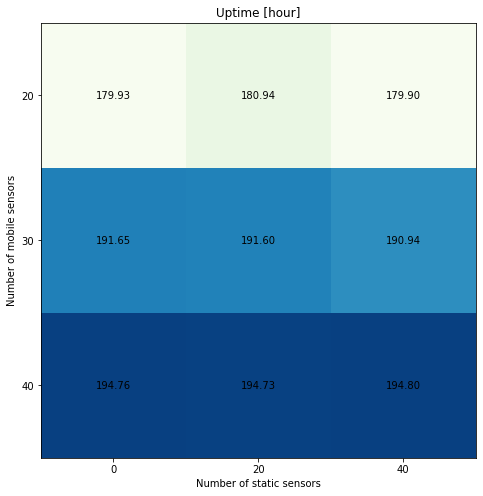

In [22]:
plot_uptimes(mean600p40)